In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [56]:
###generating Data

In [57]:
X,Y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=2
    ,
    random_state=10,
)
# X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=1)
# print(X.shape,Y.shape)

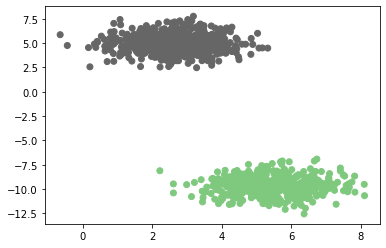

In [58]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [59]:
## Model and helper functions

In [60]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [61]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(nX1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    #print(weights)
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [62]:
weights=train(X,Y,learning_rate=0.1,maxEpochs=1000)

Epoch 0 Loss 0.1043
Epoch 10 Loss 0.0266
Epoch 20 Loss 0.0156
Epoch 30 Loss 0.0111
Epoch 40 Loss 0.0087
Epoch 50 Loss 0.0071
Epoch 60 Loss 0.0061
Epoch 70 Loss 0.0053
Epoch 80 Loss 0.0047
Epoch 90 Loss 0.0042
Epoch 100 Loss 0.0038
Epoch 110 Loss 0.0035
Epoch 120 Loss 0.0032
Epoch 130 Loss 0.0030
Epoch 140 Loss 0.0028
Epoch 150 Loss 0.0026
Epoch 160 Loss 0.0025
Epoch 170 Loss 0.0024
Epoch 180 Loss 0.0022
Epoch 190 Loss 0.0021
Epoch 200 Loss 0.0020
Epoch 210 Loss 0.0019
Epoch 220 Loss 0.0019
Epoch 230 Loss 0.0018
Epoch 240 Loss 0.0017
Epoch 250 Loss 0.0017
Epoch 260 Loss 0.0016
Epoch 270 Loss 0.0015
Epoch 280 Loss 0.0015
Epoch 290 Loss 0.0014
Epoch 300 Loss 0.0014
Epoch 310 Loss 0.0014
Epoch 320 Loss 0.0013
Epoch 330 Loss 0.0013
Epoch 340 Loss 0.0012
Epoch 350 Loss 0.0012
Epoch 360 Loss 0.0012
Epoch 370 Loss 0.0012
Epoch 380 Loss 0.0011
Epoch 390 Loss 0.0011
Epoch 400 Loss 0.0011
Epoch 410 Loss 0.0010
Epoch 420 Loss 0.0010
Epoch 430 Loss 0.0010
Epoch 440 Loss 0.0010
Epoch 450 Loss 0.0010

In [63]:
def getpredictions(X_Test,weights,labels=True):
    if X_Test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_Test.shape[0],1))
        X_Test=np.hstack((ones,X_Test))
        

    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels

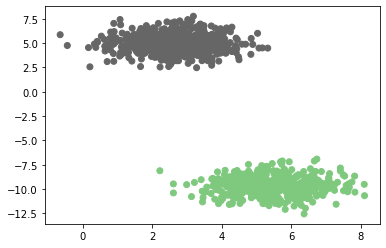

In [64]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [65]:
x1=np.linspace(-2,10,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]

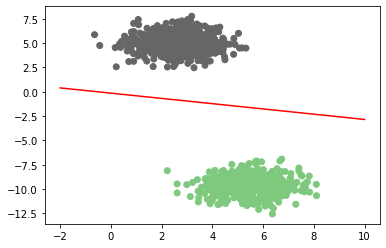

In [66]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [67]:
Y_=getpredictions(X,weights,labels=True)
training_acc=np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

1.0
